#Importing Libraries


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [23]:
df=pd.read_csv("/content/Ames_Housing_Sales.csv")

In [24]:
df.sample(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
147,1392.0,1070.0,168.0,None,4,1Fam,TA,Mn,57.0,0.0,...,0.0,Pave,9,1392.0,AllPub,239.0,2005,2006,2006,320000.0
237,1005.0,1286.0,0.0,None,4,1Fam,None,None,0.0,0.0,...,0.0,Pave,8,975.0,AllPub,192.0,1999,1999,2006,230000.0
169,1362.0,720.0,0.0,None,3,1Fam,None,None,0.0,0.0,...,0.0,Pave,6,1362.0,AllPub,280.0,2003,2003,2008,200000.0
777,1489.0,0.0,0.0,None,3,1Fam,None,None,0.0,0.0,...,0.0,Pave,7,1489.0,AllPub,0.0,2006,2006,2006,232600.0
157,1656.0,0.0,0.0,None,3,1Fam,Gd,Gd,639.0,0.0,...,0.0,Pave,7,1080.0,AllPub,210.0,1960,1960,2010,215000.0


In [25]:
df.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
Alley           0
BedroomAbvGr    0
               ..
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
SalePrice       0
Length: 80, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

# Data Cleaning

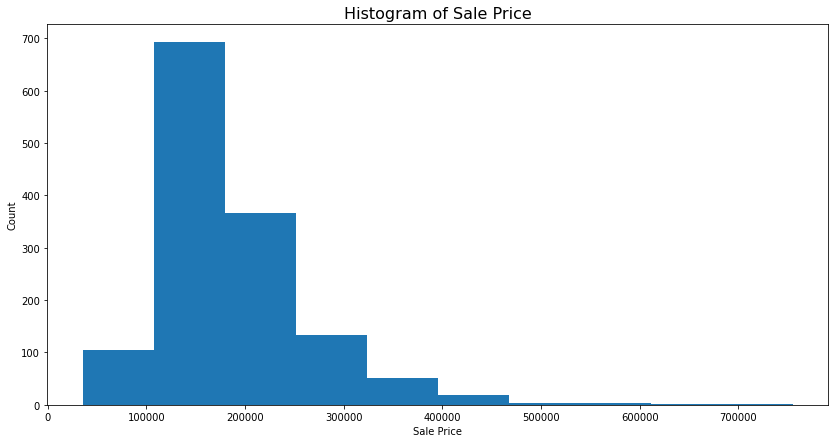

In [27]:
plt.figure(figsize=(14,7))
plt.hist(df['SalePrice'])
plt.title('Histogram of Sale Price', size = 16)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

the data is normally distributed and most is between 450000 and 50000 

above 450000 is outer lines so I will drop them

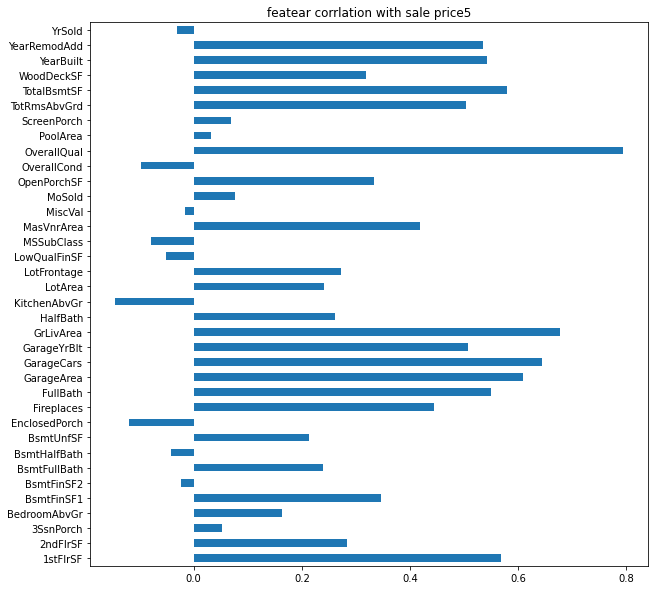

In [28]:
df = df[df['SalePrice'] <= 450000]
featuers=df.drop(['SalePrice'],axis=1)
corlation=featuers.corrwith(df['SalePrice'])
plt.figure(figsize=(10,10))
corlation.plot(kind='barh',title='featear corrlation with sale price5')
plt.show()

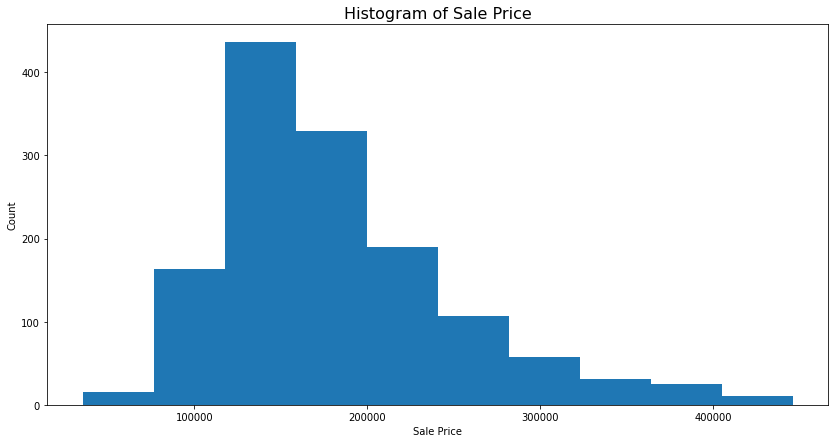

In [29]:
plt.figure(figsize=(14,7))
plt.hist(df['SalePrice'])
plt.title('Histogram of Sale Price', size = 16)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

droping low features corrlations with sales price

In [30]:
high_corlations=corlation[corlation >.2].index
df[high_corlations].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1378
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1365 non-null   float64
 1   2ndFlrSF      1365 non-null   float64
 2   BsmtFinSF1    1365 non-null   float64
 3   BsmtFullBath  1365 non-null   int64  
 4   BsmtUnfSF     1365 non-null   float64
 5   Fireplaces    1365 non-null   int64  
 6   FullBath      1365 non-null   int64  
 7   GarageArea    1365 non-null   float64
 8   GarageCars    1365 non-null   int64  
 9   GarageYrBlt   1365 non-null   float64
 10  GrLivArea     1365 non-null   float64
 11  HalfBath      1365 non-null   int64  
 12  LotArea       1365 non-null   float64
 13  LotFrontage   1365 non-null   float64
 14  MasVnrArea    1365 non-null   float64
 15  OpenPorchSF   1365 non-null   float64
 16  OverallQual   1365 non-null   int64  
 17  TotRmsAbvGrd  1365 non-null   int64  
 18  TotalBsmtSF   1365 non-null 

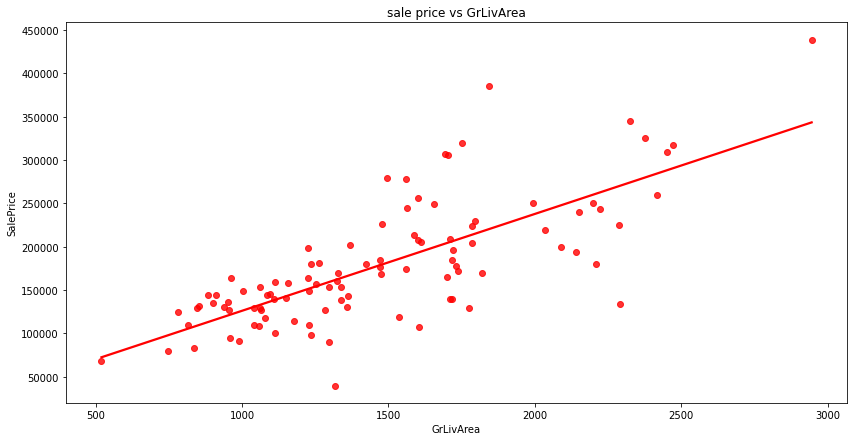

In [31]:
plt.figure(figsize=(14,7))
sns.regplot(x=df.GrLivArea[:100],y=df['SalePrice'][:100],data=df, ci=None,color='red').set_title('sale price vs GrLivArea')
plt.show()
df = df[df['GrLivArea'] <= 2500]

GrLivArea have no outer lines

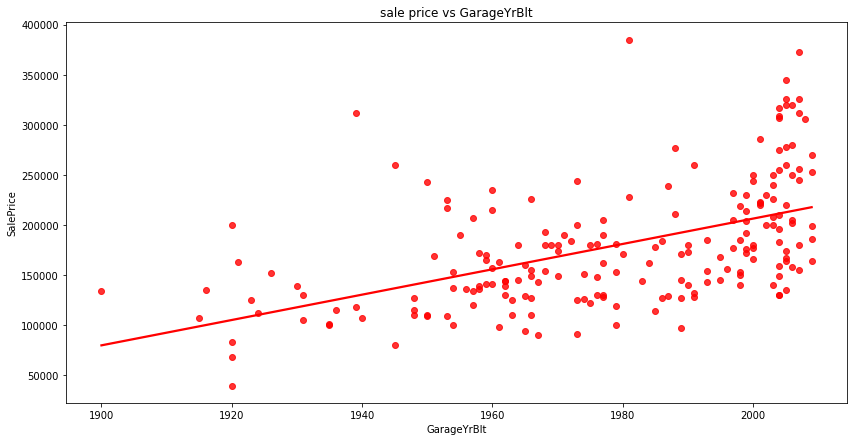

In [35]:
plt.figure(figsize=(14,7))
sns.regplot(x=df.GarageYrBlt[:200],y=df['SalePrice'][:200],data=df, ci=None,color='red').set_title('sale price vs GarageYrBlt')
plt.show()

In [91]:
cond=[(df["GarageYrBlt"]<2000) & (df["SalePrice"]>35000)]
cond=np.transpose(cond)
cond=pd.DataFrame(cond)
cond.columns=['condition']
#df=df.()
cond.value_counts()

condition
True         928
False        378
dtype: int64

377 house below 2000 and 35000 so its not an outer line we cant drop them

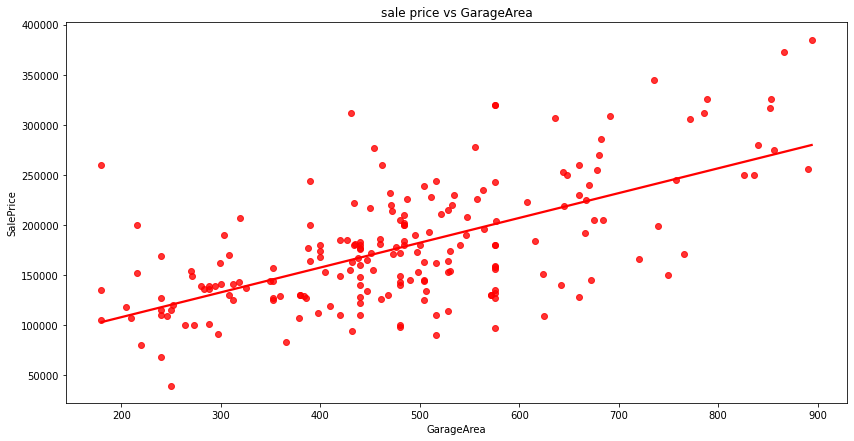

In [92]:
plt.figure(figsize=(14,7))
sns.regplot(x=df.GarageArea[:200],y=df['SalePrice'][:200],data=df, ci=None,color='red').set_title('sale price vs GarageArea')
plt.show()

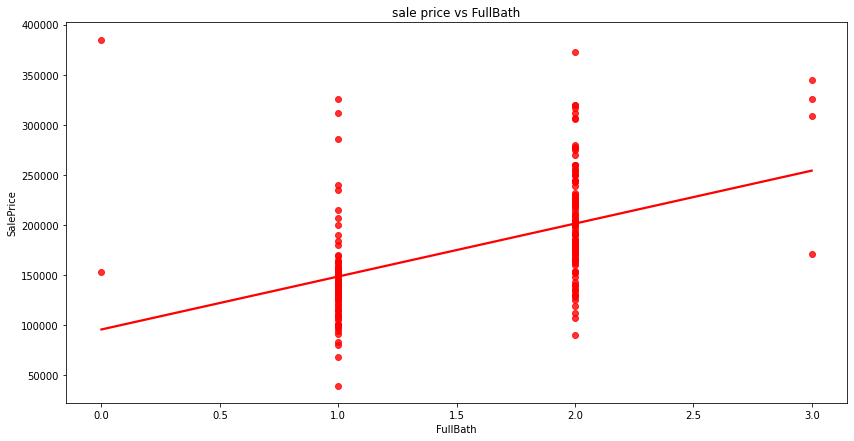

In [93]:
plt.figure(figsize=(14,7))
sns.regplot(x=df.FullBath[:200],y=df['SalePrice'][:200],data=df, ci=None,color='red').set_title('sale price vs FullBath')
plt.show()

there is only 4 baths above 3 so I will drop them

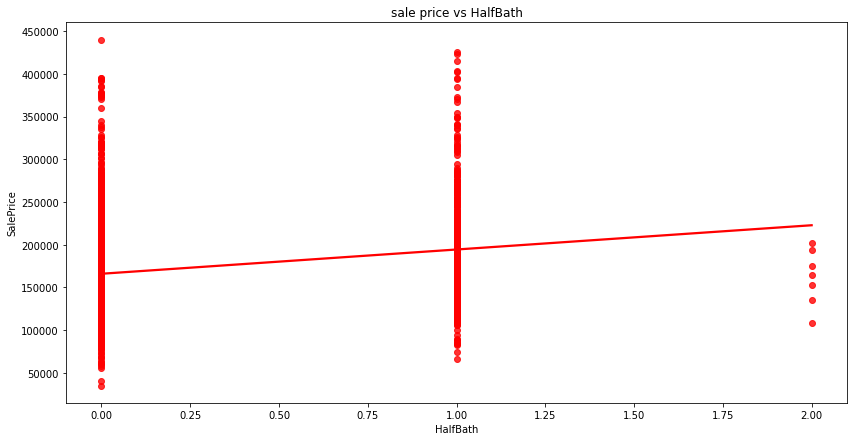

In [94]:
plt.figure(figsize=(14,7))
sns.regplot(x=df.HalfBath,y=df['SalePrice'],data=df, ci=None,color='red').set_title('sale price vs HalfBath')
plt.show()
df = df[df['HalfBath'] <= 2]

In [95]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [96]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [97]:
X=X[high_corlations]

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42,shuffle=True)

#Modeling

Liner Regression

In [ ]:
ln=LinearRegression()
ln.fit(X_train,y_train)
pred2=ln.predict(X_test)
print(ln.score(X_test, y_test))

0.8768719609537192


I will do a for loop to tell me which is the best parametars for RFR 

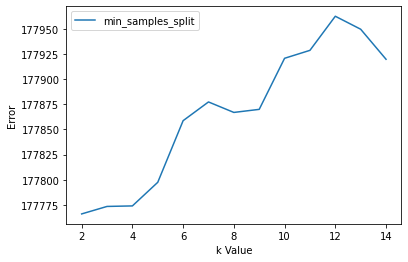

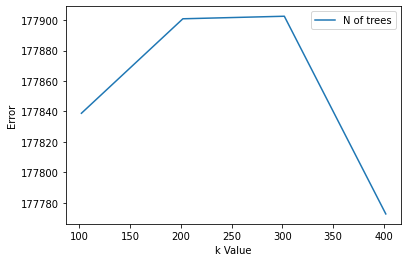

In [99]:
error1=[]
for k in range(2,15):
    forest = RandomForestRegressor(min_samples_split=k, n_estimators =400, random_state = 1)
    forest.fit(X_train,y_train)
    y_pred1= forest.predict(X_test)
    error1.append(np.mean(y_pred1))
plt.figure('test K')
plt.plot(range(2,15),error1,label="min_samples_split")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()

error1=[]
for k in range(102,501,100):
    forest = RandomForestRegressor(min_samples_split=2, n_estimators = k, random_state = 1)
    forest.fit(X_train,y_train)
    y_pred1= forest.predict(X_test)
    error1.append(np.mean(y_pred1))
plt.figure('test K')
plt.plot(range(102,501,100),error1,label="N of trees")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()

the best n_estimators is 400 and min_samples_split is 2

In [100]:
forest=RandomForestRegressor(n_estimators=400,min_samples_split=2,random_state =42)
forest.fit(X_train,y_train)
forest_pred=forest.predict(X_test)
print('forest score : ',forest.score(X_test,y_test),'\n')

forest score :  0.8975167130051266 



# MSE

In [101]:
mse=mean_squared_error(y_test,forest_pred)
print('mse :',mse)

mse : 490191468.6237387


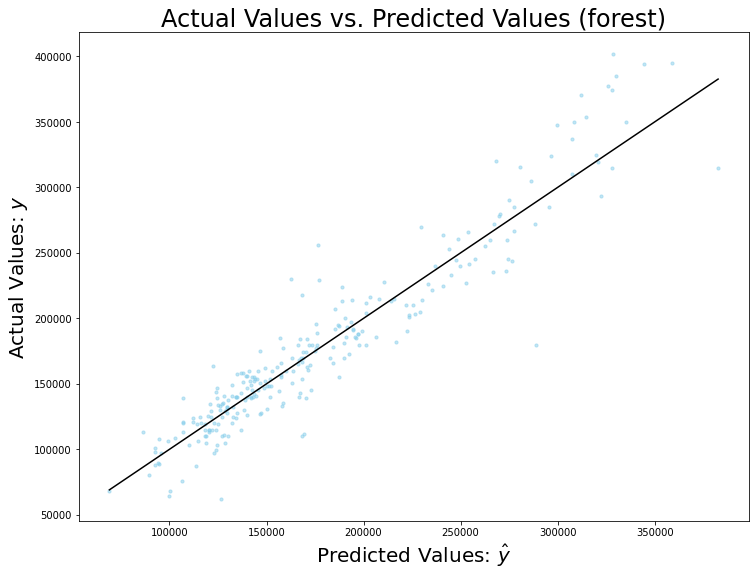

In [102]:
plt.figure(figsize=(12,9))
# Generate a scatterplot of predicted values versus actual values.
plt.scatter(forest_pred, y_test, s=10, color='skyblue', alpha = 0.5)
plt.plot([np.min(forest_pred), np.max(forest_pred)],
         [np.min(forest_pred), np.max(forest_pred)],
         color = 'black')
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Actual Values vs. Predicted Values (forest)', fontsize = 24)
plt.show()

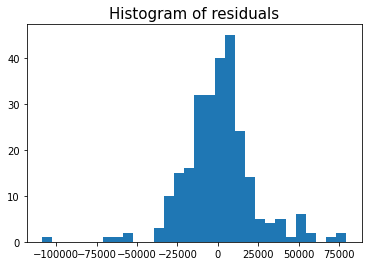

In [103]:
resid = y_test - forest_pred
plt.hist(resid, bins=30)
plt.title('Histogram of residuals', size=15)
plt.show()
